<a href="https://colab.research.google.com/github/gdebasish11/HR_Analytics_Analysis/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/IBM_HR_Analytics/dataset_attrition.csv")


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()
## no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [ ]:
# Dropping variables that just have one value.
df.drop([ 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


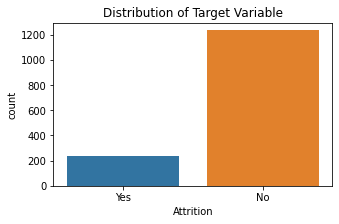

In [ ]:
# Checking the target variable distribution

plt.figure(figsize = (5,3))
sns.countplot('Attrition',data=df).set_title('Distribution of Target Variable')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


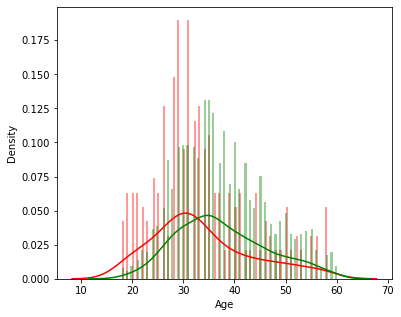

In [ ]:
## check if age is the cause of attrition
data_attr=df.loc[df['Attrition']=="Yes"]
data_no_attr=df.loc[df['Attrition']=="No"]
plt.figure(figsize = (6,5))
plot = sns.distplot(data_attr["Age"],color='red',bins=100)
plot = sns.distplot(data_no_attr["Age"],color='green',bins=100)  
plt.show()

As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age,

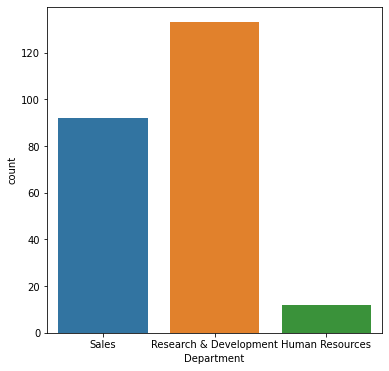

In [ ]:
##  Department wise attrition analysis
plt.figure(figsize = (6,6))
plot = sns.countplot(x="Department",data=data_attr)
#plot = sns.countplot(x="Department",data=data_no_attr)  
plt.show()

In [ ]:
df_attr=df.loc[df['Attrition']=="Yes"]
df_group_department=df_attr.groupby("Department").agg(["count"]).reset_index()
df_group_department

,Department,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
0,Human Resources,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
1,Research & Development,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133
2,Sales,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92


In [ ]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


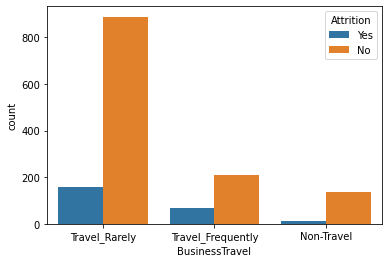

In [5]:
## check if total BusinessTravel has any relation wt attrition

#df_grp_attr=df_attr.groupby("Attrition").agg(["count"]).reset_index()
#sns.countplot(x="BusinessTravel",data=data_attr)
sns.countplot(x=df.BusinessTravel,hue=df.Attrition)
plt.show()

**Employee Attrition by Education**

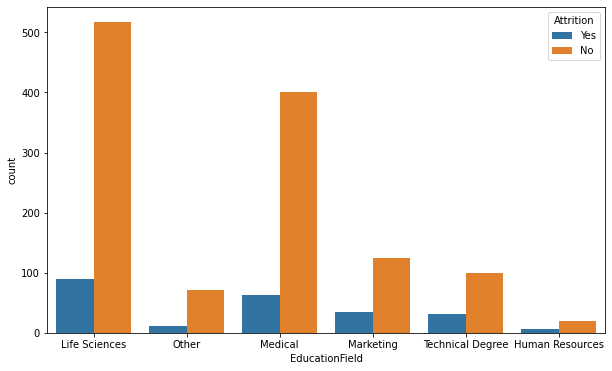

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.EducationField,hue=df.Attrition)
plt.show()

**Employee Attrition by Gender**

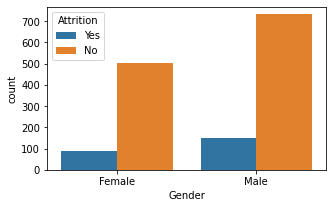

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x=df.Gender,hue=df.Attrition)
plt.show()

**Employee Attrition by Distance**

Distance from home for employees to get to work is from 1 to 29 miles.
Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles
Median distance from home for currently active employees: 7 miles and ex-employees: 9 miles
Standard Deviation distance from home for currently active employees: 8.01 miles and ex-employees: 8.45 miles


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


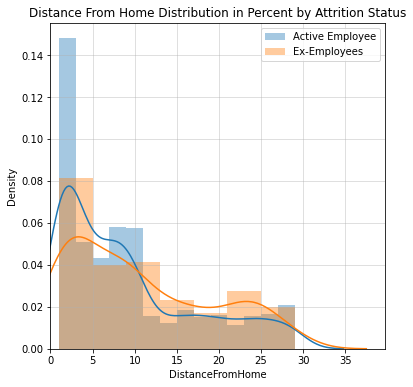

In [27]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(),
                                                                                       df['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

print('Median distance from home for currently active employees: {:.0f} miles and ex-employees: {:.0f} miles'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].median(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].median()))

print('Standard Deviation distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df[df['Attrition'] == 'No']['DistanceFromHome'].std(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].std()))


plt.figure(figsize=(6,6))
plt.grid(True, alpha=0.5)
sns.distplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.distplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Distance From Home Distribution in Percent by Attrition Status');

**Employee Attrition by Age**

In [19]:
print("Employee age in company varies from {} to {} to years".format(df['Age'].min(),df['Age'].max()))

print("Median Age of employees who leaves company is {} and standard deviation is {} years"
.format(df[df['Attrition']=='Yes']['Age'].median(),df[df['Attrition']=='Yes']['Age'].std()))

print("Median Age of employees who stays in  company is {} and standard deviation is {} years"
.format(df[df['Attrition']=='No']['Age'].median(),df[df['Attrition']=='No']['Age'].std()))


Employee age in company varies from 18 to 60 to years
Median Age of employees who leaves company is 32.0 and standard deviation is 9.689349895351624 years
Median Age of employees who stays in  company is 36.0 and standard deviation is 8.888360024976535 years


In [17]:
df[df['Attrition']=='Yes']['Age'].median(),df[df['Attrition']=='Yes']['Age'].std()

(32.0, 9.689349895351624)

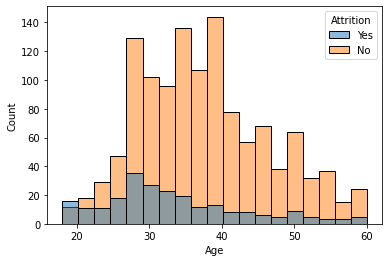

In [22]:
sns.histplot(x=df.Age,hue=df.Attrition)

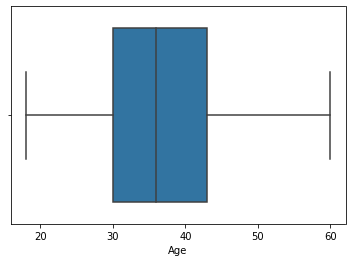

In [12]:
sns.boxplot(data=df,x=df.Age,hue=df.Attrition)

**Employee Attrition by Monthly Income**

In [23]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [25]:
print("Monthly income in company varies from Min {}  to Max {}.".format(df['MonthlyIncome'].min(),df['MonthlyIncome'].max()))

print("Median Monthly income of employees who leaves company is {} and standard deviation is {} "
.format(df[df['Attrition']=='Yes']['MonthlyIncome'].median(),df[df['Attrition']=='Yes']['MonthlyIncome'].std()))

print("Median Monthly income of employees who stays in  company is {} and standard deviation is {} "
.format(df[df['Attrition']=='No']['MonthlyIncome'].median(),df[df['Attrition']=='No']['MonthlyIncome'].std()))

Monthly income in company varies from Min 1009  to Max 19999.
Median Monthly income of employees who leaves company is 3202.0 and standard deviation is 3640.210367103852 
Median Monthly income of employees who stays in  company is 5204.0 and standard deviation is 4818.208000784481 


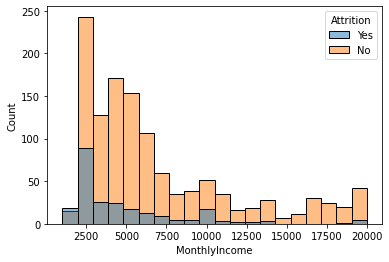

In [26]:
sns.histplot(x=df['MonthlyIncome'],hue=df['Attrition'])

*As we can see the Employee's leaving tend to be farther from home.*

**Employee Attrition by Years**

In [ ]:
print("Number of Years at the company varies from {} to {} years.".format(df["YearsAtCompany"].min(),df["YearsAtCompany"].max()))

print('Ex-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'
.format(df[df["Attrition"]=="Yes"]["YearsAtCompany"].median(),df[df["Attrition"]=="Yes"]["YearsAtCompany"].std()))

print('Current-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'
.format(df[df["Attrition"]=="No"]["YearsAtCompany"].median(),df[df["Attrition"]=="No"]["YearsAtCompany"].std()))

Number of Years at the company varies from 0 to 40 years.
Ex-exmployees: median number of year at the company = 3 years old and standard deviation = 5.9
Current-exmployees: median number of year at the company = 6 years old and standard deviation = 6.1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


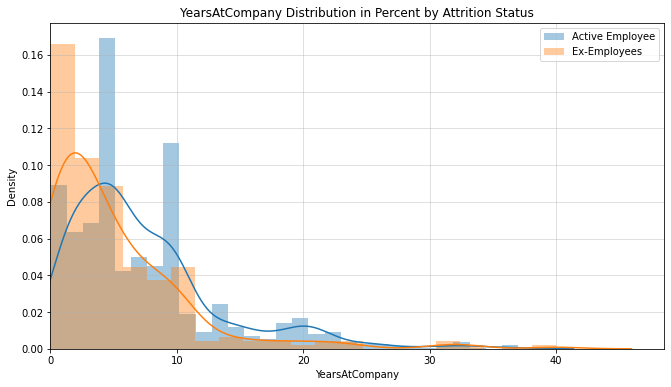

In [ ]:
plt.figure(figsize=(11,6))
plt.grid(True, alpha=0.5)
sns.distplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.distplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('YearsAtCompany Distribution in Percent by Attrition Status');

**How does Work Life Balance impact the overall attrition rates?**

In [ ]:
print("WorkLifeBalance at the company varies from {} to {} years.".format(df["WorkLifeBalance"].min(),df["WorkLifeBalance"].max()))

print('Ex-exmployees: median WorkLifeBalance in the company = {:.0f} and standard deviation = {:.1f}'
.format(df[df["Attrition"]=="Yes"]["WorkLifeBalance"].median(),df[df["Attrition"]=="Yes"]["WorkLifeBalance"].std()))

print('Current-exmployees: median WorkLifeBalance at the company = {:.0f} and standard deviation = {:.1f}'
.format(df[df["Attrition"]=="No"]["WorkLifeBalance"].median(),df[df["Attrition"]=="No"]["WorkLifeBalance"].std()))

WorkLifeBalance at the company varies from 1 to 4 years.
Ex-exmployees: median WorkLifeBalance in the company = 3 and standard deviation = 0.8
Current-exmployees: median WorkLifeBalance at the company = 3 and standard deviation = 0.7


In [ ]:
df['WorkLifeBalance']

0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64